In [1]:
# https://signate.jp/competitions/751/data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample_submit.csv",header=None)

In [2]:
# trainデータの先頭行を表示
train.head()

,id,age,sex,bmi,children,smoker,region,charges
0,0,26,male,32.665465,3,no,southeast,0
1,1,41,male,29.798725,1,no,southwest,0
2,2,28,male,32.722029,0,yes,northwest,1
3,3,20,female,38.429831,2,no,southeast,0
4,4,45,female,29.641854,1,no,northwest,0


In [3]:
# testデータの先頭行を表示
test.head()

,id,age,sex,bmi,children,smoker,region
0,13,19,male,24.365178,1,no,northeast
1,23,59,male,33.997763,0,yes,northeast
2,27,42,female,29.283450,0,no,southwest
3,28,30,male,24.903725,1,no,northwest
4,29,41,female,29.644536,0,no,southwest


In [4]:
# trainデータの統計的な情報を表示
print(train.describe())

               id          age          bmi     children      charges
count  1600.00000  1600.000000  1600.000000  1600.000000  1600.000000
mean   1007.86250    38.985000    32.424376     1.014375     0.306250
std     575.26841    13.555012     5.766915     1.259031     0.628656
min       0.00000    18.000000    20.627626     0.000000     0.000000
25%     515.75000    27.000000    28.634267     0.000000     0.000000
50%    1010.50000    40.000000    32.268786     1.000000     0.000000
75%    1509.25000    50.000000    37.069581     2.000000     0.000000
max    1999.00000    64.000000    47.290644     5.000000     2.000000


In [9]:
# 一応NULL値ないか確認
print(train.isnull().sum())
# カテゴリー内の値を確認
print(train["sex"].unique())
print(train["smoker"].unique())
print(train["region"].unique())

# カテゴリーをOne-Hotエンコーディング
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, categories='auto',dtype=int)
sl_np = ohe.fit_transform(train[['sex','smoker','region']])

sl_df = pd.DataFrame(data = sl_np, columns = ["sex_female","sex_male","smoker_no","smoker_yes","region_southeast","region_southwest","region_northwest","region_northeast"])
sl_df

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
['male' 'female']
['no' 'yes']
['southeast' 'southwest' 'northwest' 'northeast']


,sex_female,sex_male,smoker_no,smoker_yes,region_southeast,region_southwest,region_northwest,region_northeast
0,0,1,1,0,0,0,1,0
1,0,1,1,0,0,0,0,1
2,0,1,0,1,0,1,0,0
3,1,0,1,0,0,0,1,0
4,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1595,0,1,1,0,0,0,0,1
1596,0,1,1,0,0,1,0,0
1597,1,0,1,0,0,0,1,0
1598,0,1,0,1,0,1,0,0


In [10]:
# データを結合
train_feature = pd.concat([train.drop(['sex','smoker','region'], axis=1), sl_df], axis=1)
train_feature

,id,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_southeast,region_southwest,region_northwest,region_northeast
0,0,26,32.665465,3,0,0,1,1,0,0,0,1,0
1,1,41,29.798725,1,0,0,1,1,0,0,0,0,1
2,2,28,32.722029,0,1,0,1,0,1,0,1,0,0
3,3,20,38.429831,2,0,1,0,1,0,0,0,1,0
4,4,45,29.641854,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1994,52,32.772830,0,0,0,1,1,0,0,0,0,1
1596,1996,29,37.189564,0,0,0,1,1,0,0,1,0,0
1597,1997,56,43.281979,1,0,1,0,1,0,0,0,1,0
1598,1998,51,28.232308,1,0,0,1,0,1,0,1,0,0


In [11]:
# testデータの統計的な情報を表示
print(test.describe())

                id         age         bmi    children
count   400.000000  400.000000  400.000000  400.000000
mean    966.050000   39.230000   32.668659    0.942500
std     585.848127   12.990149    5.932800    1.219801
min      13.000000   18.000000   21.848978    0.000000
25%     431.750000   28.000000   28.711650    0.000000
50%     970.000000   40.000000   32.284144    0.000000
75%    1458.750000   50.000000   37.112334    2.000000
max    1995.000000   64.000000   46.890354    5.000000


In [12]:
# testの方も変換
test_categories = test[['sex','smoker','region']]

# カテゴリーをOne-Hotエンコーディング
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, categories='auto',dtype=int)
sl_np = ohe.fit_transform(test_categories)
# print(sl_np)

sl_df = pd.DataFrame(data = sl_np,columns = ["sex_female","sex_male","smoker_no","smoker_yes","region_southeast","region_southwest","region_northwest","region_northeast"])
sl_df
# データを結合
test_feature = pd.concat([test.drop(['sex','smoker','region'], axis=1), sl_df], axis=1)
# test_feature

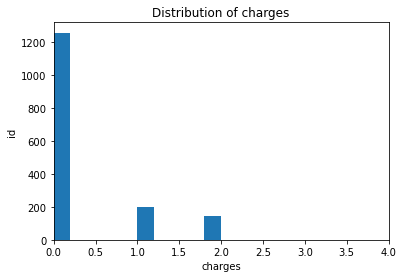

In [13]:
# 目的変数(charges)の分布を可視化
plt.hist(train['charges'])
plt.xlabel('charges')
plt.ylabel('id')
plt.title('Distribution of charges')
plt.xlim(0, 4) 
plt.show()

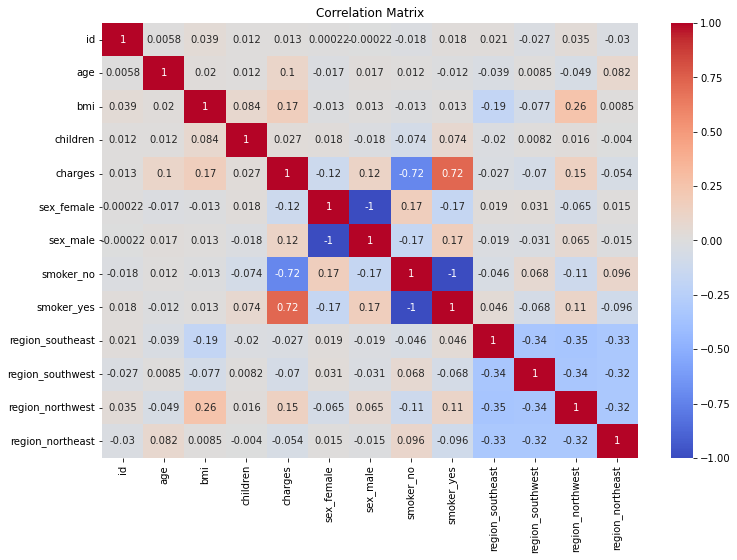

In [16]:
# 数値列の相関行列を計算
correlation_matrix = train_feature.corr()
# 相関行列のヒートマップを可視化
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
correlation_with_price_range = train_feature.corr()['charges'].drop('charges')
correlation_with_price_range

id                  0.013463
age                 0.102112
bmi                 0.171282
children            0.026830
sex_female         -0.118389
sex_male            0.118389
smoker_no          -0.723247
smoker_yes          0.723247
region_southeast   -0.026767
region_southwest   -0.069689
region_northwest    0.148423
region_northeast   -0.053630
Name: charges, dtype: float64